In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import normalize
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import random
import numpy as np

In [3]:
model_20221030 = load_model('../Trained_models/20221030_atherosclerosis_model.h5')
model_20221031 = load_model('../Trained_models/20221031_atherosclerosis_model.h5')
model_20230325 = load_model('../Trained_models/20230325_atherosceloris_model.h5')
model_20230326 = load_model('../Trained_models/20230326_atherosceloris_model.h5')
model_20230329 = load_model('../Trained_models/20230329_atherosceloris_model.h5')
model_20230330 = load_model('../Trained_models/20230330_atherosceloris_model.h5')
model_20230331 = load_model('../Trained_models/20230331_atherosceloris_model.h5')
model_20230421 = load_model('../Trained_models/20230421_atherosceloris_model.h5')
model_20230422 = load_model('../Trained_models/20230422_atherosceloris_model.h5')
model_20230423 = load_model('../Trained_models/20230423_atherosceloris_model.h5')
model_20230501 = load_model('../Trained_models/20230501_atherosceloris_model.h5')
model_20230505 = load_model('../Trained_models/20230505_atherosceloris_model.h5')

In [7]:
testing_image = './upside-down.png'

In [5]:
def segment_image(model, img_path):
    img = cv2.imread(img_path, 0)
    img = np.array(img)

    img = np.expand_dims(img, axis=2)
    img = normalize(img, axis=1)

    img_norm = img[:,:,0][:,:,None]
    img_input=np.expand_dims(img_norm, 0)
    prediction=(model.predict(img_input))
    predicted_img=np.argmax(prediction, axis=3)[0,:,:]
    
    return predicted_img

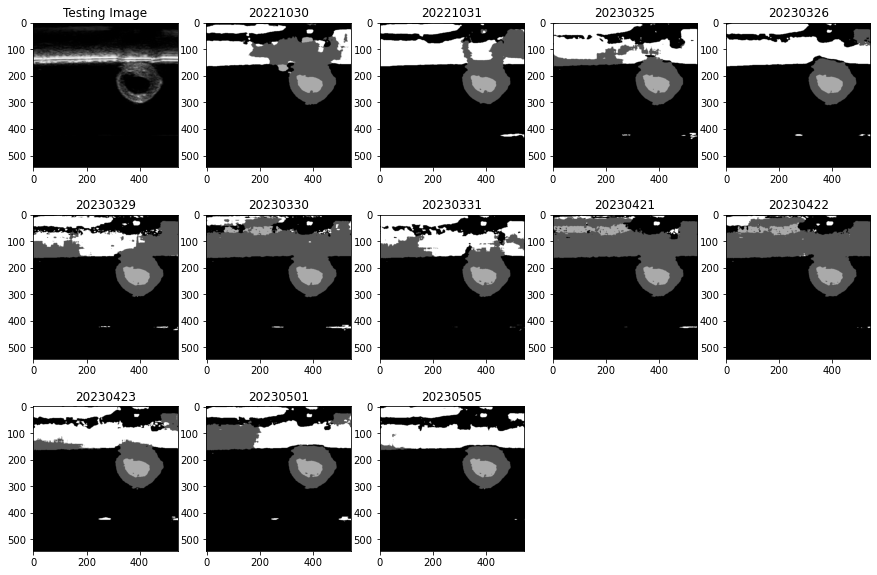

In [8]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(351)
plt.title('Testing Image')
plt.imshow(cv2.imread(testing_image, 0), cmap='gray')
plt.subplot(352)
plt.title('20221030')
plt.imshow(segment_image(model_20221030, testing_image), cmap='gray')
plt.subplot(353)
plt.title('20221031')
plt.imshow(segment_image(model_20221031, testing_image), cmap='gray')
plt.subplot(354)
plt.title('20230325')
plt.imshow(segment_image(model_20230325, testing_image), cmap='gray')
plt.subplot(355)
plt.title('20230326')
plt.imshow(segment_image(model_20230326, testing_image), cmap='gray')
plt.subplot(356)
plt.title('20230329')
plt.imshow(segment_image(model_20230329, testing_image), cmap='gray')
plt.subplot(357)
plt.title('20230330')
plt.imshow(segment_image(model_20230330, testing_image), cmap='gray')
plt.subplot(358)
plt.title('20230331')
plt.imshow(segment_image(model_20230331, testing_image), cmap='gray')
plt.subplot(359)
plt.title('20230421')
plt.imshow(segment_image(model_20230421, testing_image), cmap='gray')
plt.subplot(3,5,10)
plt.title('20230422')
plt.imshow(segment_image(model_20230422, testing_image), cmap='gray')
plt.subplot(3,5,11)
plt.title('20230423')
plt.imshow(segment_image(model_20230423, testing_image), cmap='gray')
plt.subplot(3,5,12)
plt.title('20230501')
plt.imshow(segment_image(model_20230501, testing_image), cmap='gray')
plt.subplot(3,5,13)
plt.title('20230505')
plt.imshow(segment_image(model_20230505, testing_image), cmap='gray')
plt.savefig('./upside-plaque.png')
plt.show()